# Gerardo de Miguel González

# Feature Selection Proof of Concept

## References

**::GMG::** I've used the following references:

  - [Machine Learning Process](https://machinelearningmastery.com/an-introduction-to-feature-selection/) An Introduction to Feature Selection. By Jason Brownlee on October 6, 2014.
  - [Machine Learning Process](https://machinelearningmastery.com/feature-selection-machine-learning-python/) Feature Selection For Machine Learning in Python. By Jason Brownlee on May 20, 2016.
  - [DataCamp](https://www.datacamp.com/community/tutorials/feature-selection-python) Beginner's Guide to Feature Selection in Python. *Learn about the basics of feature selection and how to implement and investigate various feature selection techniques in Python*. Sayak Paul. September 25th, 2018.
  - [wikipedia](https://en.wikipedia.org/wiki/Chi-squared_test) Chi-squared test
  - [scikit-learn](https://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection) 1.13.2. Univariate feature selection

  **::NOTE::** Jason Brownlee (2014) comments on a *Feature selection Checklist* from a seminal paper on variable selection that I haven't used but I think I should (and perphaps I will):

> Isabelle Guyon and Andre Elisseeff the authors of “[An Introduction to Variable and Feature Selection](http://jmlr.csail.mit.edu/papers/volume3/guyon03a/guyon03a.pdf)” provide an excellent checklist that you can use the next time you need to select data features for you predictive modeling problem.

and also *read that paper* to that.

## Libraries

In [1]:
#::GMG::Dataset handling basics
import pandas as pd
import numpy as np

In [2]:
#::GMG::Visualization: matplotlib 
#       and seaborn: statistical data visualization for a heatmap of pandas.corr()
#::NOTE::There's a lot of fuss for 'heatmapping' with matplotlib only
# https://matplotlib.org/3.1.0/gallery/images_contours_and_fields/image_annotated_heatmap.html
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#::GMG::Split train and test
# https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection
from sklearn.model_selection import train_test_split

In [4]:
#::GMG::Logistic Regression (aka logit) model for classification
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
from sklearn.linear_model import LogisticRegression

In [5]:
#::GMG::Precision-Recall curves should be used when there is a moderate to large class imbalance
# https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.average_precision_score.html
from sklearn.metrics import precision_recall_curve, auc, average_precision_score

In [6]:
#::GMG::Helper for plotting Precision-Recall curve
from inspect import signature

In [7]:
#::GMG::Balanced Accuracy for taking into account the dataset (im)balance
# https://scikit-learn.org/stable/modules/model_evaluation.html#balanced-accuracy-score
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html
from sklearn.metrics import balanced_accuracy_score

In [8]:
#::GMG::confusion matrix and one report for all metrics and confusion matrix
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
# https://scikit-learn.org/stable/modules/model_evaluation.html#classification-report
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [9]:
#::GMG::Libraries for filter (univariate) feature selection
# https://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [10]:
#::GMG::For pre-processing not conmensurate features
# https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-data
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

## Dataset

**::GMG::** The dataset *was available* in [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php) but there's only [a text file](https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/) with a notice at the moment what reads:

*Thank you for your interest in the Pima Indians Diabetes dataset. 
The dataset is no longer available due to permission restrictions.*

**::GMG::** There are alternatives to downloading the csv formatted file though. I'm not sure whether those alternatives are going to keep being available in the near future. The first alternative that I've found out allows a direct download of a csv formated raw data, without any metadata (header):

  - [networkrepository.com](http://networkrepository.com/pima-indians-diabetes.php)
  
However you can read metadata info and citation policy in the web page. The website also provides tools for interactive exploration of data. You can visualize and interactively explore pima-indians-diabetes and its important statistics.

```BibText
@inproceedings{nr,
     title={The Network Data Repository with Interactive Graph Analytics and Visualization},
     author={Ryan A. Rossi and Nesreen K. Ahmed},
     booktitle={AAAI},
     url={http://networkrepository.com},
     year={2015}
}
```

**::NOTE::** I don't know how to deal with [Bibtext](https://en.wikipedia.org/wiki/BibTeX) bibliographic entries in Notebooks yet.

**::GMG::** You may also [download the data from kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database/downloads/pima-indians-diabetes-database.zip/1) in zipped csv format (which *includes a header* with the column names by the way) using [the reference provided](https://www.kaggle.com/uciml/pima-indians-diabetes-database) in the Datacamp article *if you have an account in kaggle*. I haven't checked it but you should be able [to use the kaggle API](https://medium.com/@yvettewu.dw/tutorial-kaggle-api-google-colaboratory-1a054a382de0) to automate the download from code *with an API key* created with your account. 

**::GMG::** I've already downloaded the csv dataset *manually from kaggle* with my account  and placed it in a data folder.

In [11]:
!ls data

pima-indians-diabetes.csv


In [12]:
#::GMG::Dataframe
data = pd.read_csv("data/pima-indians-diabetes.csv")

In [13]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [15]:
print("Diabetes data set dimensions : {}".format(data.shape))

Diabetes data set dimensions : (768, 9)


## Exploratory Data Analysis

### stats

**::GMG::** There are 8 different integer and real features and the categorical (binary) *Outcome* or *target variable* where `1` stands for having diabetes, and `0` denotes not having diabetes that in the `DataFrame` is a `int64` (integer) value.

In [16]:
#::GMG::See details of features, target, data tyoes, entry number, ...
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**::GMG::** This makes me think of the Isabelle Guyon and Andre Elisseeff's feature Selection Checklist

> 2. Are your features commensurate? If no, consider normalizing them.

quoted in Brownlee (2014). So are they?

In [17]:
#::GMG::Statistics reveal some issues related to invalid values on some features, 
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**::GMG::** Note that there's a strong correlation between `Age` and `Pregnancies` (redundace?) and between `Glucose` and `Outcome` (importance?). On the other hand, there's almost no correlation between `SkinThickness` and `Outcome` nor between `BloodPressure` and `Outcome` (candidates for removal?). 

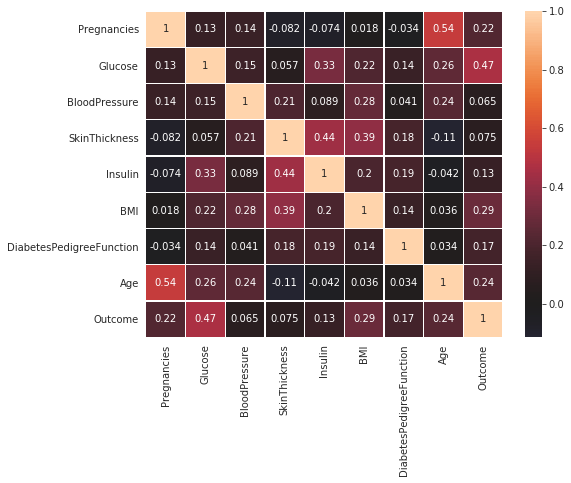

In [18]:
#::GMG::Not much insight from correlation
color = sns.color_palette()
sns.set_style('darkgrid')
plt.subplots(figsize=(8,6))
sns.heatmap(data.corr(), center=0, annot=True, linewidths=.3)

### outliers

In [27]:
#::GMG::Unexpected outliers checkout
#       Glucose, Insulin, BloodPressure, SkinThickness, and BMI 
#       which have zeros (min) in their values (see describe())
print("Zero Plasma Glucose  Total : ", data[data.Glucose == 0].shape[0])
print("Zero Insulin level   Total : ", data[data.Insulin == 0].shape[0])
print("Zero Blood Pressure  Total : ", data[data.BloodPressure == 0].shape[0])
print("Zero Skin Thickness  Total : ", data[data.SkinThickness == 0].shape[0])
print("Zero Body Mass Index Total : ", data[data.BMI == 0].shape[0])

Zero Plasma Glucose  Total :  5
Zero Insulin level   Total :  374
Zero Blood Pressure  Total :  35
Zero Skin Thickness  Total :  227
Zero Body Mass Index Total :  11


### imbalance

**::GMG::** There is imbalance. It's not a extreme imbalance but I'll take it into account in train/test splitting and the choice of metrics for method evaluation.

In [19]:
#::GMG::Beware of the imbalance dataset ...
#       https://www.quora.com/What-is-an-imbalanced-dataset
#       https://www.datacamp.com/community/tutorials/diving-deep-imbalanced-data
#       https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18
data.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

Text(0, 0.5, 'Frequency %')

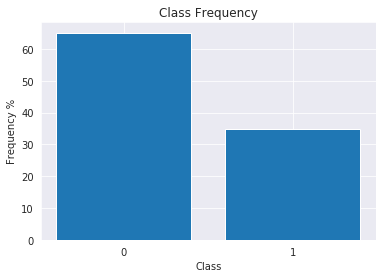

In [20]:
#::GMG::Say, 0 healthy, 1 diabetes
# https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.chararray.astype.html
# https://matplotlib.org/gallery/lines_bars_and_markers/categorical_variables.html
classes = data.Outcome.values
unique, counts = np.unique(classes, return_counts=True)
plt.bar(unique.astype(np.character),100*counts/classes.size)
plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency %')

## Stratified train/test split

In [21]:
#::GMG::I'm going to preserve the proportions of classes with stratify parameter
# https://stackoverflow.com/questions/34842405/parameter-stratify-from-method-train-test-split-scikit-learn
x_train, x_test, y_train, y_test = train_test_split(
    data.iloc[:,:data.shape[1] - 1], data['Outcome'],
    test_size = 0.3,
    random_state = 70,
    stratify = data['Outcome']
)

Text(0, 0.5, 'Frequency %')

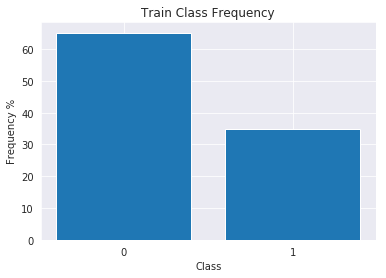

In [22]:
#::GMG::I keep (im)balance in train set
classes_train = y_train.values
unique, counts = np.unique(classes_train, return_counts = True)
plt.bar(unique.astype(np.character),100*counts/classes_train.size)
plt.title('Train Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency %')

Text(0, 0.5, 'Frequency %')

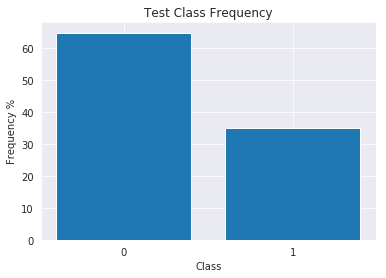

In [23]:
#::GMG::I keep (im)balance in test set
classes_test = y_test.values
unique, counts = np.unique(classes_test, return_counts = True)
plt.bar(unique.astype(np.character),100*counts/classes_test.size)
plt.title('Test Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency %')

In [24]:
x_train.shape, y_train.shape

((537, 8), (537,))

In [25]:
x_test.shape, y_test.shape

((231, 8), (231,))

## Pre-processing

In [26]:
#::GMG::Trying to list all objects used at the moment
# https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-who
%whos

Variable                  Type             Data/Info
----------------------------------------------------
LogisticRegression        type             <class 'sklearn.linear_mo<...>stic.LogisticRegression'>
SelectKBest               ABCMeta          <class 'sklearn.feature_s<...>e_selection.SelectKBest'>
StandardScaler            type             <class 'sklearn.preproces<...>ing.data.StandardScaler'>
auc                       function         <function auc at 0x7fde59f616a8>
average_precision_score   function         <function average_precisi<...>_score at 0x7fde593be378>
balanced_accuracy_score   function         <function balanced_accura<...>_score at 0x7fde59345158>
chi2                      function         <function chi2 at 0x7fde5883a0d0>
classes                   ndarray          768: 768 elems, type `int64`, 6144 bytes
classes_test              ndarray          231: 231 elems, type `int64`, 1848 bytes
classes_train             ndarray          537: 537 elems, type `int64`, 4296 

### outliers

**::GMG::** The dataset is known to have *outliers*. Specifically, there are *missing observations* for some columns that are marked as a zero value. A zero value is invalid for `BloodPressure`, `SkinThickness`, `Glucose` and `BMI`. It's less obvious for `Insulin`.

**::NOTE::** I've [searched](https://www.google.com/search?client=firefox-b-d&q=a+person+can+have+zero+insulin%3F) about the zero Insulin issue (Hypoglycemia). So [it turns out](https://www.yourhormones.info/hormones/insulin/) that

> People with type 1 diabetes produce very little or no insulin at all. This condition is caused when the beta cells that make insulin have been destroyed by antibodies (these are usually substances released by the body to fight against infections), hence they are unable to produce insulin.

[but](https://www.medicalnewstoday.com/articles/267241.php):

> Type 1 diabetes was previously thought to render the pancreas completely unable to produce insulin, the hormone responsible for controlling sugar entry into cells and subsequent blood levels.
>
>The truth, researchers have now discovered, is that very small amounts of insulin are produced in "most" patients, and that levels in the blood even respond to food intake.
>


and [also](https://www.medicalnewstoday.com/articles/322744.php):

> Hypoglycemia occurs when blood sugar levels fall dangerously low. It is more common in people with diabetes, but it can affect others.

So the imputation of non-zero levels of `Insulin` in a uniform way between samples of both classes is not a good idea. And the value of the imputation is not clear. So I'm going to leave those zeros as they are. Untouched.

**::GMG::** I may just *remove* the samples with the ouliers alltogether. The problem with `Insulin` and `Skin Thickness` is that they are a significant part of the dataset. They cannot be removed. I may use [an imputation method](https://scikit-learn.org/stable/modules/impute.html#imputation-of-missing-values) to replace the zeros, say filling in *average/mean values*, but in this case putting a mean value to the blood pressure column would [send a wrong signal](http://www.bloodpressureuk.org/BloodPressureandyou/Yourbody/Diabetes) to the model. I may also *avoid using the features* involved. But I don't know if they're relevant or redundant yet.

In [22]:
#::GMG::Hard choice to make ... remove the rows where the “BloodPressure”, 
#       “BMI” and “Glucose” are zero (small number of rows, low impact)
#::NOTE::This is NOT good practice (data leakage?)
#data_mod = data[(data.BloodPressure != 0) & 
#                (data.BMI != 0) & 
#                (data.Glucose != 0)
#               ]

### scaling

In [ ]:
#::GMG::Standarize the features
#::NOTE::Why? Chi2 
scaler = StandardScaler()

In [ ]:
#::GMG::Do it in the train set
scaler.fit(x_train)

In [ ]:
#::GMG::Check the outcome
x_train.describe()

In [ ]:
#::GMG::Do it in the test set
#::NOTE::Done separately to aovid data leakage ;)
scaler.fit(x_train)

In [ ]:
#::GMG::Check the outcome
x_test.describe()

## Baseline (binary) classification

**::GMG::** I'm gonna make a baseline classification (with all the features) to check later whether the filterwise feature selection has any effect at all. 

### model

In [35]:
#::GMG::class_weight : dict or ‘balanced’, optional (default=None)
#       The “balanced” mode uses the values of y to automatically adjust weights inversely 
#       proportional to class frequencies in the input data as 
#       n_samples / (n_classes * np.bincount(y))
#
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
lr_bm = LogisticRegression(solver = 'liblinear', class_weight = 'balanced', random_state = 2)

### fit and predict

In [36]:
#::GMG::Train the model
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.fit
#
# sample_weight : array-like, shape (n_samples,) optional
lr_bm.fit(X = x_train, y = y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=2,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [37]:
#::GMG::Now it's time to predict
pred_bm = lr_bm.predict(X = x_test)

In [38]:
#::GMG::Scores
print('Score Train: {:4.3f} \nScore Test: {:4.3f}'.format(
    lr_bm.score(X = x_train, y = y_train),
    lr_bm.score(X = x_test, y = y_test)
    )
)

Score Train: 0.745 
Score Test: 0.817


### evaluation

In [39]:
#::GMG:: It is the macro-average of recall scores per class or, equivalently, 
#        raw accuracy where each sample is weighted according to the inverse prevalence 
#        of its true class. Thus for balanced datasets, the score is equal to accuracy.
print('Balanced Accuracy Score: {:4.3f}'.format(
    balanced_accuracy_score(y_true = y_test, y_pred = pred_bm)))

Balanced Accuracy Score: 0.809


In [40]:
#::GMG::Report
target_names = ['healthy', 'diabetes']
print('Classification Report:\n')
print(classification_report(y_true = y_test, y_pred = pred_bm, 
                            target_names=target_names, digits = 3))

Classification Report:

              precision    recall  f1-score   support

     healthy      0.881     0.832     0.856       143
    diabetes      0.711     0.787     0.747        75

   micro avg      0.817     0.817     0.817       218
   macro avg      0.796     0.809     0.801       218
weighted avg      0.823     0.817     0.819       218



In [41]:
#::GMG::Confusion Matrix
cm_bm = confusion_matrix(y_true = y_test, y_pred = pred_bm)
print(cm_bm)

[[119  24]
 [ 16  59]]


In [42]:
#::GMG::Predict probabilities instead of classes for the precision/recall curve
probs_bm = lr_bm.predict_proba(X = x_test)
prob_bm = probs_bm[:, 1]

In [43]:
#::GMG::average precision 
apc_bm = average_precision_score(y_true = y_test, 
                                 y_score = prob_bm, 
                                 pos_label = 1, 
                                 average = 'weighted')
print('Average Precision Weighted: {:4.3f}'.format(apc_bm))

Average Precision Weighted: 0.736


In [44]:
#::GMG::Precision-Recall Curve
precision_bm, recall_bm, _ = precision_recall_curve(
    y_true = y_test, 
    probas_pred = prob_bm, 
    pos_label = 1
)

In [45]:
#::GMG::AUC (precision, recall)
auc_pr_bm = auc(x = recall_bm, y = precision_bm)
print('AUC Precision/Recall: {:4.3f}'.format(auc_pr_bm))

AUC Precision/Recall: 0.727


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.74')

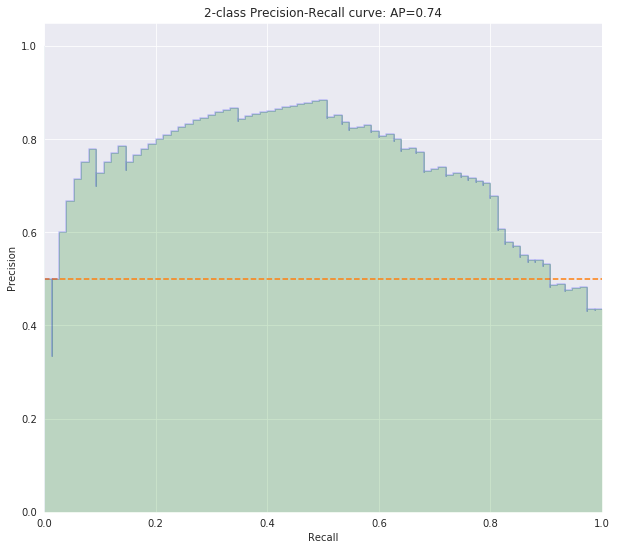

In [47]:
#::GMG::Plot Recall-Precision Curve
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.figure(figsize = (10,9))
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--', color = 'C1')
plt.step(recall_bm, precision_bm, color='b', alpha=0.2, where='post')
plt.fill_between(recall_bm, precision_bm, alpha=0.2, color='g', **step_kwargs)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(apc_bm))

## Filter: $\chi^2$ statistical test

**::GMG::** Filter method $\chi^2$ statistical test for non-negative features to select 4 of the best features from the dataset. A [scikit-learn library](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection) provides the [`SelectKBest`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest) class that can be used with the [$\chi^2$ statistical test](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html#sklearn.feature_selection.chi2) (Some [background](https://en.wikipedia.org/wiki/Chi-squared_test) on the statitical test itself is needed, I guess)

**::NOTE::** The datacamp tutorial toy example which uses the *full dataset* to perform the filter type feature selection and selects an arbitrary number of them ... This is not the way real feature selection is performed, isn't this? So I think ...

**::GMG::** Now, I wonder how to proceed. Should I do the filter feature selection *before* the model evaluation? It makes sense to me. But raises the question of using *the same dataset* for fearure selection and model evaluation. Is it right? [Jason Brownlee](https://machinelearningmastery.com/feature-selection-machine-learning-python/) (2016) quotes two stackechange discussion about this.

>It is important to consider feature selection a part of the model selection process. If you do not, you may inadvertently introduce bias into your models which can result in overfitting.
>
>    … should do feature selection on a different dataset than you train [your predictive model] on … the effect of >not doing this is you will overfit your training data.
>
>— Ben Allison in answer to “[Is using the same data for feature selection and cross-validation biased or not?](http://stats.stackexchange.com/questions/40576/is-using-the-same-data-for-feature-selection-and-cross-validation-biased-or-not)”

So it seems that I cannot just do the split, train my model on the train split *and* perform then the feature selection on the *same* train split! Like I'm doing here.

**::GMG::** Indeed a bloke has (written) voiced the doubt I had within the blog responses threads:

>  ZH May 3, 2019 at 3:17 am #
>
>Hi Jeson, thanks for this great article!
I have confusion where you say in this article:
“A mistake would be to perform feature selection first to prepare your data, then perform model selection and training on the selected features.”
I believed that performing feature selection first and then perform model selection and training on the selected features, is called filter-based method for feature selection.
– So why this is a mistake?
– Is this a mistake to use Filter-based method which relies only on data set and is classifier-independent?
>
>-“Including feature selection within the inner-loop when using cross-validation&grid-search for model selection”, means that we do feature selection while creating model, is this called embedded method?

And Jason answered:

> It would lead to data leakage:
https://machinelearningmastery.com/data-leakage-machine-learning/



In [36]:
#::GMG::Feature selection (subset?)
#::NOTE::Why 4?
test = SelectKBest(score_func = chi2, k = 4)
test.fit(x_train, y_train)

In [46]:
test.pvalues_

array([2.131e-010, 1.859e-177, 2.684e-007, 0.000e+000, 2.851e-017,
       3.054e-002, 1.274e-031])

In [47]:
# Summarize scores
np.set_printoptions(precision=3))
print(test.scores_)

[  40.343  806.728   26.465 2363.27    71.445    4.679  136.891]
[  40.343  806.728   26.465 2363.27    71.445    4.679  136.891]


In [48]:
#::GMG::See scores related to features ...
# https://www.journaldev.com/15891/python-zip-function
for values in zip(data_final.columns, test.scores_):
    print(values)

('Pregnancies', 40.342828833999306)
('Glucose', 806.7280087765105)
('BloodPressure', 26.464910867252453)
('Insulin', 2363.270196352275)
('BMI', 71.44466696395962)
('DiabetesPedigreeFunction', 4.678668885298059)
('Age', 136.8911947568232)


In [49]:
#::GMG::I zip long column names and scores
zipped_full = zip(data_final.columns, test.scores_)

In [50]:
#::GMG::Rank the zipped object by score (key [1])
# https://docs.python.org/3.6/howto/sorting.html
# https://stackoverflow.com/questions/7142227/how-do-i-sort-a-zipped-list-in-python
sorted(zipped_full, key = lambda x: x[1], reverse = True)

[('Insulin', 2363.270196352275),
 ('Glucose', 806.7280087765105),
 ('Age', 136.8911947568232),
 ('BMI', 71.44466696395962),
 ('Pregnancies', 40.342828833999306),
 ('BloodPressure', 26.464910867252453),
 ('DiabetesPedigreeFunction', 4.678668885298059)]

In [42]:
#::GMG::So this would be the final dataset manually from the results above
data_final.loc[:10, ('Insulin', 'Glucose', 'Age', 'BMI', 'Outcome')]

,Insulin,Glucose,Age,BMI,Outcome
0,0,148,50,33.6,1
1,0,85,31,26.6,0
2,0,183,32,23.3,1
3,94,89,21,28.1,0
4,168,137,33,43.1,1
5,0,116,30,25.6,0
6,88,78,26,31.0,1
8,543,197,53,30.5,1
10,0,110,30,37.6,0


In [51]:
#::GMG::Select features based on scores using the API
#       fit_transform() will return a new array where the feature set has been reduced 
#       to the best 'k'. 
# https://datascience.stackexchange.com/questions/10773/how-does-selectkbest-work
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html
x_train_fs = test.transform(x_train)

In [52]:
x_train_fs.shape

(506, 4)

In [45]:
type(x_train_fs)

numpy.ndarray

In [53]:
#::GMG::I can do transform() also in the test set
x_test_fs = test.transform(x_test)

In [56]:
x_test_fs.shape

(218, 4)

In [57]:
#::GMG::It's funny the way columns (selected features) are distributed in numpy ndarrays
#       You have to guess based on the original column set (data_final)
#       i.e. Glucose Insulin BMI Age
x_test_fs[:10,:]

array([[109. ,   0. ,  25. ,  27. ],
       [111. ,   0. ,  27.5,  40. ],
       [152. ,  29. ,  26.8,  43. ],
       [108. ,   0. ,  27.1,  24. ],
       [152. , 272. ,  41.5,  27. ],
       [179. , 159. ,  37.8,  22. ],
       [124. ,   0. ,  27.6,  29. ],
       [156. ,   0. ,  48.3,  32. ],
       [164. ,  67. ,  32.8,  50. ],
       [118. ,   0. ,  44.5,  26. ]])

In [59]:
#::GMG::Same as x_test_fs (come to think of it, it's like a mirror image of column pairs)
#       i.e. Glucose Insulin BMI Age
x_train_fs[:10,:]

array([[ 90. ,  54. ,  37.7,  29. ],
       [123. , 165. ,  42.1,  26. ],
       [112. ,   0. ,  31.6,  25. ],
       [102. ,   0. ,  39.5,  42. ],
       [ 80. ,   0. ,  19.1,  21. ],
       [ 97. ,  91. ,  40.9,  32. ],
       [137. ,   0. ,  32. ,  39. ],
       [134. ,   0. ,  28.9,  23. ],
       [ 88. ,  16. ,  28.4,  22. ],
       [189. ,   0. ,  28.5,  37. ]])

## After $\chi^2$ classification

**::GMG::** Let's check whether the selection process is a success or not. I have: (x_train_fs, y_train) and (x_test_fs, y_test)

**::NOTE::** I am concerned with *the validity* of this evaluation on the same dataset as used in the feature selection phase. I may argue that the filter feature selection method is *indepemdent* of the classification method I'm using so I don't have to worry about that. I'd say that it would only matter if I'd used a cross-validation evaluation method.

**::PENDING::** I'll read all the discusions before I make my mind about the precdure I've used here :)

  - [StackExchange](http://stats.stackexchange.com/questions/40576/is-using-the-same-data-for-feature-selection-and-cross-validation-biased-or-not) “Is using the same data for feature selection and cross-validation biased or not?”
  - [StackExchange](http://stats.stackexchange.com/questions/2306/feature-selection-for-final-model-when-performing-cross-validation-in-machine) “Feature selection for final model when performing cross-validation in machine learning”
  - [StackExchange](http://stats.stackexchange.com/questions/27750/feature-selection-and-cross-validation)  “Feature selection and cross-validation”

### model

In [61]:
lr_bm_fs = LogisticRegression(solver = 'liblinear', 
                              class_weight = 'balanced', 
                              random_state = 3)

### fit and predict

In [62]:
lr_bm_fs.fit(X = x_train_fs, y = y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=3,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [63]:
pred_bm_fs = lr_bm_fs.predict(X = x_test_fs)

In [64]:
print('Score Train: {:4.3f} \nScore Test: {:4.3f}'.format(
    lr_bm_fs.score(X = x_train_fs, y = y_train),
    lr_bm_fs.score(X = x_test_fs, y = y_test)
    )
)

Score Train: 0.717 
Score Test: 0.780


### evaluation

In [65]:
print('Balanced Accuracy Score: {:4.3f}'.format(
    balanced_accuracy_score(y_true = y_test, y_pred = pred_bm_fs)))

Balanced Accuracy Score: 0.769


In [66]:
target_names = ['healthy', 'diabetes']
print('Classification Report:\n')
print(classification_report(y_true = y_test, y_pred = pred_bm_fs, 
                            target_names=target_names, digits = 3))

Classification Report:

              precision    recall  f1-score   support

     healthy      0.852     0.804     0.827       143
    diabetes      0.663     0.733     0.696        75

   micro avg      0.780     0.780     0.780       218
   macro avg      0.757     0.769     0.762       218
weighted avg      0.787     0.780     0.782       218



In [67]:
cm_bm_fs = confusion_matrix(y_true = y_test, y_pred = pred_bm_fs)
print('Confusion Matrix: \n{}'.format(cm_bm_fs))

Confusion Matrix: 
[[115  28]
 [ 20  55]]


In [68]:
#::GMG::Predict probabilities instead of classes for the precision/recall curve
prob_bm_fs = lr_bm_fs.predict_proba(X = x_test_fs)[:, 1]
#prob_bm_fs = probs_bm_fs[:, 1]

In [69]:
apc_bm_fs = average_precision_score(y_true = y_test, 
                                    y_score = prob_bm_fs, 
                                    pos_label = 1, 
                                    average = 'weighted')
print('Average Precision Weighted: {:4.3f}'.format(apc_bm_fs))

Average Precision Weighted: 0.725


In [70]:
#::GMG::Precision-Recall Curve
precision_bm_fs, recall_bm_fs, _ = precision_recall_curve(
    y_true = y_test, 
    probas_pred = prob_bm_fs, 
    pos_label = 1
)

In [71]:
#::GMG::AUC (precision, recall)
auc_pr_bm_fs = auc(x = recall_bm_fs, y = precision_bm_fs)
print('AUC Precision/Recall: {:4.3f}'.format(auc_pr_bm_fs))

AUC Precision/Recall: 0.716


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.72')

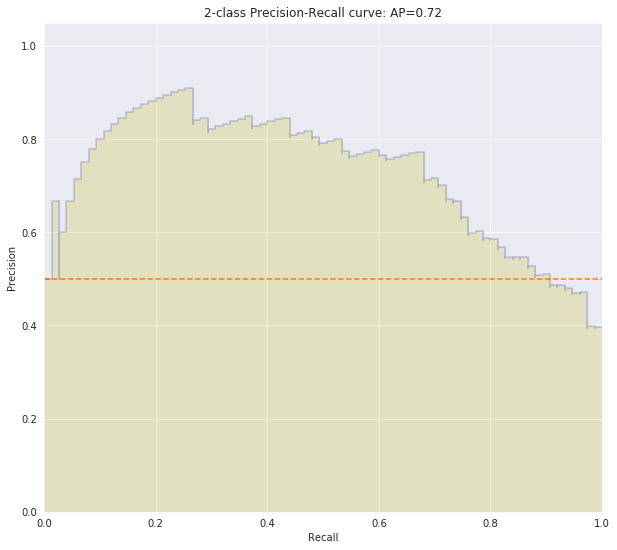

In [73]:
#::GMG::Plot Recall-Precision Curve
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.figure(figsize = (10,9))
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--', color = 'C1')
plt.step(recall_bm_fs, precision_bm_fs, color='b', alpha=0.2, where='post')
plt.fill_between(recall_bm_fs, precision_bm_fs, alpha=0.2, color='y', **step_kwargs)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(apc_bm_fs))

## More

**::GMG::** In the [feature selection uset guide](https://scikit-learn.org/stable/modules/feature_selection.html) of sckit-learn I can see that there are more methods that may be applied for classification, i.e. [f_classif](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html#sklearn.feature_selection.f_classif), [mutual_info_classif](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html#sklearn.feature_selection.mutual_info_classif). The latter requires *more samples* for accurate estimation and the latter *assumes Gaussian distribution* of the features.

**NOTE** I'm in doubt about when I should use `f_classif` or `mutual_info_classif` given a dataset.

### filter: f_classif

In [76]:
from sklearn.feature_selection import SelectPercentile, f_classif

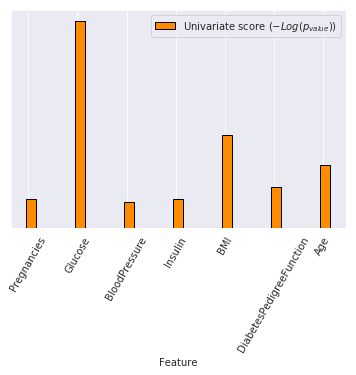

In [133]:
#::GMG::I give a try to f_classif with another 'univariate feature selection' method, i.e. SelectPercentile
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectPercentile.html
# 
# As seen in: 
# https://scikit-learn.org/stable/auto_examples/feature_selection/plot_feature_selection.html
#
# #############################################################################
# Univariate feature selection with F-test for feature scoring
# ==> NO <== We use the default selection function: the 10% most significant features
#::GMG:: I use the 50% most significant features
selector = SelectPercentile(score_func = f_classif, percentile = 50)
selector.fit(x_train, y_train)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()
X_indices = np.arange(x_train.shape[-1])
#plt.bar(X_indices - .45, scores, width=.2,
#        label=r'Univariate score ($-Log(p_{value})$)', color='darkorange',
#        edgecolor='black')
plt.bar(X_indices + .05, scores, width=.2,
        label=r'Univariate score ($-Log(p_{value})$)', color='darkorange',
        edgecolor='black')
#plt.xlabel('Feature number')
plt.xlabel('Feature')
# https://stackoverflow.com/questions/3100985/plot-with-custom-text-for-x-axis-points
plt.xticks(ticks = X_indices, 
           labels = x_train.columns.tolist(), 
           rotation = 60)
plt.yticks(())
plt.axis('tight')
plt.legend(loc='upper right')

In [126]:
x_train.columns.tolist()

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

**::GMG** how do I interpret that graph?

In [98]:
print('The most important feature: {}'.format(x_train.columns[scores.argmax()]))

The most important feature: Glucose


In [109]:
print('The features ordered by scores: \n{}'.format(
        np.flip(
            x_train.columns[scores.argsort()]
        ).tolist()
        )
    )

The features ordered by scores: 
['Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction', 'Pregnancies', 'Insulin', 'BloodPressure']


In [113]:
# https://stackoverflow.com/questions/4440516/in-python-is-there-an-elegant-way-to-print-a-list-in-a-custom-format-without-ex
print('\n'.join('{}: {}'.format(*k) for k in enumerate(
        np.flip(
            x_train.columns[scores.argsort()]
        ).tolist()
        )
    )
)

0: Glucose
1: BMI
2: Age
3: DiabetesPedigreeFunction
4: Pregnancies
5: Insulin
6: BloodPressure


In [99]:
x_train_fs_per = selector.transform(x_train)

In [100]:
x_train_fs_per.shape

(506, 3)

In [101]:
x_train_fs_per[:10,]

array([[ 90. ,  37.7,  29. ],
       [123. ,  42.1,  26. ],
       [112. ,  31.6,  25. ],
       [102. ,  39.5,  42. ],
       [ 80. ,  19.1,  21. ],
       [ 97. ,  40.9,  32. ],
       [137. ,  32. ,  39. ],
       [134. ,  28.9,  23. ],
       [ 88. ,  28.4,  22. ],
       [189. ,  28.5,  37. ]])

In [114]:
#::GMG::What if ... :)
s_f = SelectKBest(score_func = f_classif, k = 4)

In [115]:
s_f.fit(X = x_train, y = y_train)

SelectKBest(k=4, score_func=<function f_classif at 0x7faa36c278c8>)

In [116]:
#np.set_printoptions(precision=3))
print(s_f.scores_)

[ 14.449 134.385  12.606  14.298  54.068  21.67   34.617]


In [118]:
sorted(zip(x_train.columns, s_f.scores_), 
       key = lambda x: x[1], 
       reverse = True)

[('Glucose', 134.38458195519337),
 ('BMI', 54.06802741145904),
 ('Age', 34.61664456479461),
 ('DiabetesPedigreeFunction', 21.670023356569565),
 ('Pregnancies', 14.448606347660135),
 ('Insulin', 14.29839522339586),
 ('BloodPressure', 12.605943036016459)]

In [119]:
x_train_fs_kb = s_f.transform(x_train)

In [120]:
x_train_fs_kb.shape

(506, 4)

In [121]:
x_train_fs_kb[:10,]

array([[ 90.   ,  37.7  ,   0.362,  29.   ],
       [123.   ,  42.1  ,   0.52 ,  26.   ],
       [112.   ,  31.6  ,   0.197,  25.   ],
       [102.   ,  39.5  ,   0.293,  42.   ],
       [ 80.   ,  19.1  ,   0.258,  21.   ],
       [ 97.   ,  40.9  ,   0.871,  32.   ],
       [137.   ,  32.   ,   0.391,  39.   ],
       [134.   ,  28.9  ,   0.542,  23.   ],
       [ 88.   ,  28.4  ,   0.766,  22.   ],
       [189.   ,  28.5  ,   0.68 ,  37.   ]])